<table>
    <tr>
        <td style='width:10%;'>
            <img src='img/intro-to-programming.svg'/>
        </td>
        <td style='width:90%;text-align:left;'>
            <div style='font-family:Inter,sans-serif;font-size: 22px;font-weight: 600;line-height: 24px;'>
                Lab 1 : Préparation de données
            </div>
            <span>visualisation de données, Imputation des valeurs manquantes.</span>
        </td>
        <td ></td>
    </tr>
</table>

<div style='font-family:Inter,sans-serif;font-size: 14px;font-weight: 600;line-height: 24px;'>
Importer les bibliothèques:</br></div>
1. Pandas pour la manipulation et l'analyse des données</br>
2. Numpy pour manipuler des matrices ou tableaux multidimensionnels</br>
3. matplotlib pour tracer et visualiser des données sous forme de graphiques</br>
4. seaborn pour la visualisation</br></br>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

<div style='font-family:Inter,sans-serif;font-size: 14px;font-weight: 600;line-height: 24px;'>
Importer le jeu de données Titanic:</br></div>
1. Afficher les 5 premières ligne du jeu de données</br>
2. Afficher les dimension de la DataFrame</br>
3. Vérifier le type de chaque colonne</br>
4. afficher les noms des colonnes de la DataFrame</br></br>


In [19]:
from google.colab import drive

In [28]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
#importer et lire un fichier, ici de type csv
df = pd.read_csv("/content/drive/MyDrive/titanic.csv")


In [32]:
#afficher un aperçu, par défaut les 5 premières lignes du jeu de données.
df = df.dropna()
df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


In [33]:
# afficher la dimension d'un dataframe
print(f"Records: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

Records: 270
Columns: 11


In [26]:
# Affichage du type de chaque colonne
print(df.dtypes)

pclass        int64
survived      int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object


In [34]:
# déterminer le nombre d'occurrences de chaque modalité d'une variable, ici la variable cible
df['survived'].value_counts()


,count
survived,
1,180
0,90


### VARIABLE DESCRIPTIONS
Pclass : Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd) ;
survival : Survival (0 = No; 1 = Yes);
name : Name ;
sex : Sex;
age : Age;
sibsp : Number of Siblings/Spouses Aboard;
parch : Number of Parents/Children Aboard;
ticket : Ticket Number;
fare : Passenger Fare (British pound);
cabin : Cabin;
embarked : Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [ ]:
# générer un résumé statistique des variables descriptives

# Etape 1 : Visualisation du jeu de données

### 1. Distribution de la variable cible (les classes sont bien équilibrées!?) Survival (0 = No; 1 = Yes)

In [35]:
survived = df['survived'].eq(1).sum()
notsurvived = df['survived'].eq(0).sum()
print(survived)
print(notsurvived)

180
90


### 2. Relation entre pclass et survived or not

In [15]:
df.groupby(['pclass','survived'])['survived'].count()

pclass  survived
1       0            80
        1           156
2       0             5
        1            16
3       0             5
        1             8
Name: survived, dtype: int64

In [36]:
grouped_df = df[['pclass', 'survived']].groupby('pclass')

for key, item in grouped_df:
    print(grouped_df.get_group(key), "\n\n")

     pclass  survived
0         1         1
1         1         1
2         1         0
3         1         0
4         1         0
..      ...       ...
312       1         0
313       1         0
314       1         1
319       1         1
322       1         1

[236 rows x 2 columns] 


     pclass  survived
333       2         1
339       2         1
340       2         1
341       2         1
342       2         1
343       2         1
349       2         1
380       2         1
465       2         1
484       2         1
485       2         0
490       2         0
514       2         1
515       2         1
516       2         0
517       2         0
520       2         1
521       2         1
568       2         0
573       2         1
584       2         1 


      pclass  survived
605        3         1
873        3         0
941        3         1
1024       3         0
1025       3         1
1026       3         1
1131       3         1
1187       3         1
1188       3   

In [37]:
grouped_df.count()

,survived
pclass,
1,236
2,21
3,13


Text(0, 0.5, 'Survival Probability')

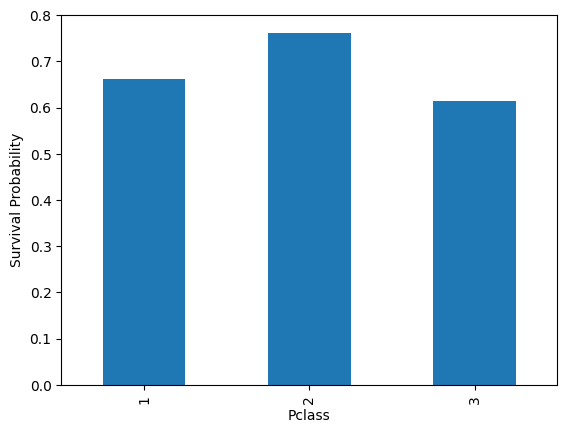

In [38]:
plt = df[['pclass', 'survived']].groupby('pclass').mean().survived.plot(kind='bar')
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')

*Les passagers de la classe 1 ont plus de chance pour survivre plus que 60%,
Les passagers de la classe 3 ont moins de chance pour survivre moins que 60%,et les passagers de la classe 2 ont plus de chance pour survivre plus que 70%,*

### 3. Distribution de la variable sexe

In [42]:
df.groupby(['sex','survived'])['survived'].count()



sex     survived
female  0             8
        1           124
male    0            82
        1            56
Name: survived, dtype: int64

In [43]:
grouped_df = df[['sex', 'survived']].groupby('sex')

for key, item in grouped_df:
    print(grouped_df.get_group(key), "\n\n")

         sex  survived
0     female         1
2     female         0
4     female         0
6     female         1
8     female         1
...      ...       ...
1187  female         1
1188  female         1
1189  female         1
1230  female         0
1231  female         0

[132 rows x 2 columns] 


       sex  survived
1     male         1
3     male         0
5     male         1
7     male         0
10    male         0
...    ...       ...
941   male         1
1024  male         0
1025  male         1
1131  male         1
1217  male         0

[138 rows x 2 columns] 




In [44]:
grouped_df.count()

,survived
sex,
female,132
male,138


Text(0, 0.5, 'Survival Probability')

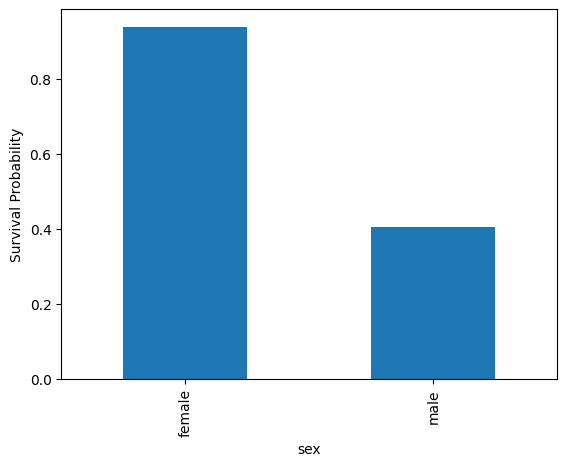

In [45]:
plt = df[['sex', 'survived']].groupby('sex').mean().survived.plot(kind='bar')
plt.set_xlabel('sex')
plt.set_ylabel('Survival Probability')

*les femmes ont une probabilité de survivre supérieure a 80% tant que les hommes ont une probabilité de survivre de 40%*

### 4. Distribution de la variable sibsp (nbr de frère et soeur/ conjoint à board)

In [46]:
df.groupby(['sibsp','survived'])['survived'].count()

sibsp  survived
0      0           57
       1           94
1      0           31
       1           74
2      0            1
       1            9
3      0            1
       1            3
Name: survived, dtype: int64

In [47]:
grouped_df = df[['sibsp', 'survived']].groupby('sibsp')

for key, item in grouped_df:
    print(grouped_df.get_group(key), "\n\n")

      sibsp  survived
0         0         1
5         0         1
7         0         0
12        0         1
14        0         1
...     ...       ...
1026      0         1
1131      0         1
1188      0         1
1217      0         0
1230      0         0

[151 rows x 2 columns] 


      sibsp  survived
1         1         1
2         1         0
3         1         0
4         1         0
6         1         1
...     ...       ...
514       1         1
515       1         1
1187      1         1
1189      1         1
1231      1         0

[105 rows x 2 columns] 


     sibsp  survived
8        2         1
42       2         1
79       2         1
206      2         0
249      2         1
250      2         1
251      2         1
339      2         1
340      2         1
341      2         1 


     sibsp  survived
111      3         1
112      3         1
113      3         1
114      3         0 




In [48]:
grouped_df.count()

,survived
sibsp,
0,151
1,105
2,10
3,4


Text(0, 0.5, 'Survival Probability')

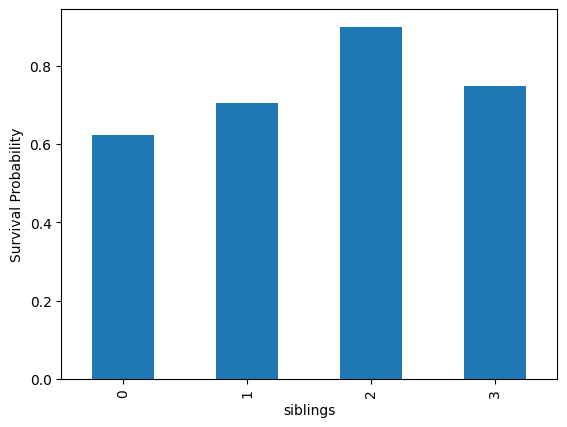

In [49]:
plt = df[['sibsp', 'survived']].groupby('sibsp').mean().survived.plot(kind='bar')
plt.set_xlabel('siblings')
plt.set_ylabel('Survival Probability')

*Les personnes ayant deux frères et sœurs (ou "siblings") ont une probabilité de survie supérieure à 80 %.*

### 5. Distribution de la variable Parch - Children/Parents

In [50]:
df.groupby(['parch','survived'])['survived'].count()

parch  survived
0      0            67
       1           115
1      0            14
       1            40
2      0             7
       1            22
3      0             1
       1             2
4      0             1
       1             1
Name: survived, dtype: int64

In [51]:
grouped_df = df[['parch', 'survived']].groupby('parch')

for key, item in grouped_df:
    print(grouped_df.get_group(key), "\n\n")

      parch  survived
0         0         1
5         0         1
6         0         1
7         0         0
8         0         1
...     ...       ...
873       0         0
941       0         1
1024      0         0
1131      0         1
1217      0         0

[182 rows x 2 columns] 


      parch  survived
16        1         0
17        1         1
20        1         1
21        1         1
36        1         1
49        1         1
50        1         1
76        1         1
77        1         0
81        1         0
83        1         1
93        1         1
95        1         1
97        1         1
102       1         1
123       1         1
124       1         1
138       1         0
139       1         1
140       1         1
141       1         1
154       1         0
155       1         1
159       1         1
160       1         1
187       1         1
188       1         1
193       1         1
212       1         0
220       1         1
221       1         0
233  

In [52]:
grouped_df.count()

,survived
parch,
0,182
1,54
2,29
3,3
4,2


from matplotlib import pyplot as plt
_df_0['parch'].plot(kind='hist', bins=20, title='parch')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['survived'].plot(kind='hist', bins=20, title='survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='parch', y='survived', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['parch']
  ys = series['survived']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('parch', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('parch')
_ = plt.ylabel('survived')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['parch']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'parch'}, axis=1)
              .sort_values('parch', ascending=True))
  xs = counted['parch']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('parch', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('parch')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['parch'].plot(kind='line', figsize=(8, 4), title='parch')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['survived'].plot(kind='line', figsize=(8, 4), title='survived')
plt.gca().spines[['top', 'right']].set_visible(False)

Text(0, 0.5, 'Survival Probability')

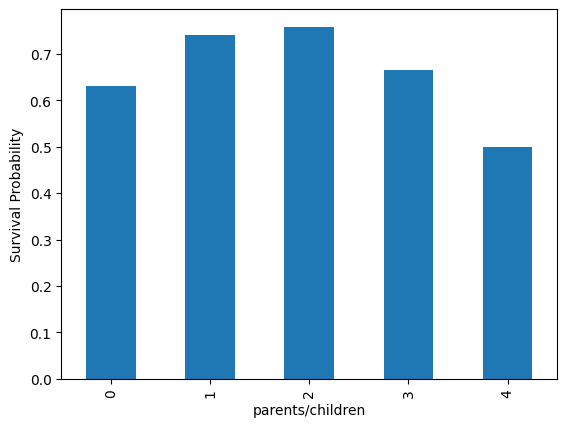

In [53]:
plt = df[['parch', 'survived']].groupby('parch').mean().survived.plot(kind='bar')
plt.set_xlabel('parents/children')
plt.set_ylabel('Survival Probability')

In [ ]:
# Autres visuels de votre choix

<table>
    <tr>
        <td style='width:5%;'>
            <img src='img/natural-language-processing-guide.svg'/>
        </td>
        <td style='width:90%;text-align:left;'>
            <div style='font-family:Inter,sans-serif;font-size: 16px;font-weight: 600;line-height: 24px;'>
                Etape 2: Transformation
            </div>
            <span>Transformation des valeur qualitatives.</span>
        </td>
        <td ></td>
    </tr>
</table>

### 1. Convertir les variables qualitatives en quantitatives

In [56]:
df['sex'] = df['sex'].map({'male':0, 'female':1})
df['embarked'] = df['embarked'].map({'C':0, 'Q':1, 'S':2})

*Garder seulement le titre de chaque passager (les caractères qui précèdent le .)*

In [57]:
df = df.name.str.extract('( [A-Za-z]+)\.', expand=False)

In [58]:
df['title'] = df.name.str.extract(' ([A-Za-z]+)\.', expand=False)


In [59]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,2,Miss
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,2,Master
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,2,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,2,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,2,Mrs


In [67]:
# supprimer la colonne "name"
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
0,1,1,1,29.0000,0,0,24160,211.3375,B5,2,Miss
1,1,1,0,0.9167,1,2,113781,151.5500,C22 C26,2,Master
2,1,0,1,2.0000,1,2,113781,151.5500,C22 C26,2,Miss
3,1,0,0,30.0000,1,2,113781,151.5500,C22 C26,2,Mr
4,1,0,1,25.0000,1,2,113781,151.5500,C22 C26,2,Mrs


<Axes: xlabel='title'>

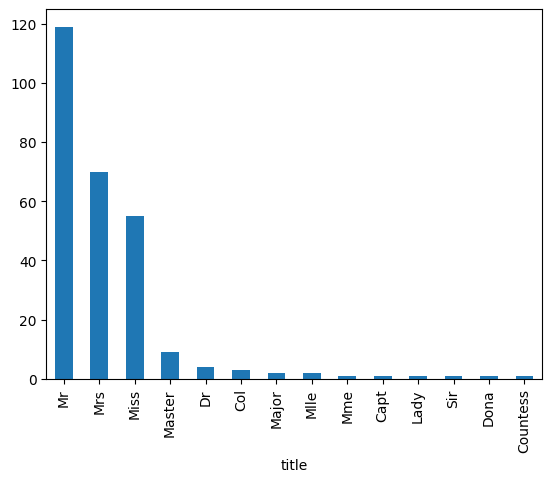

In [68]:
df.title.value_counts().plot(kind='bar')

In [69]:
df['title'] = df['title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don', 'Dona'], 'Others')
df['title'] =df['title'].replace('Ms', 'Miss')
df['title'] = df['title'].replace('Mme', 'Mrs')
df['title'] = df['title'].replace('Mlle', 'Miss')

Text(0, 0.5, 'Passenger count')

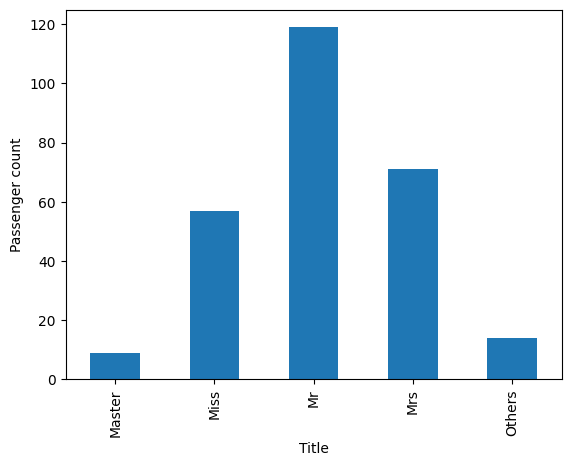

In [70]:
plt = df.title.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Title')
plt.set_ylabel('Passenger count')

Text(0, 0.5, 'Survival Probability')

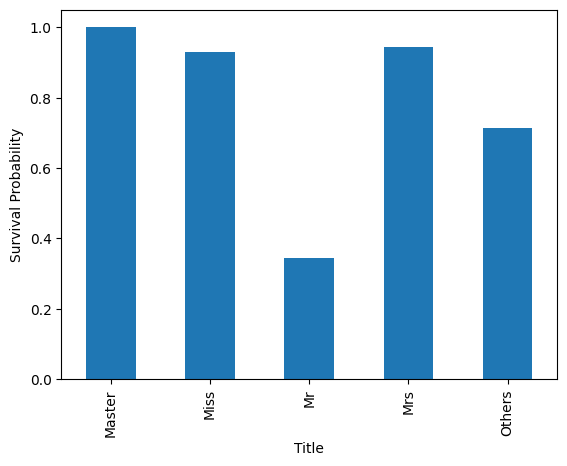

In [71]:
plt = df[['title', 'survived']].groupby('title').mean().survived.plot(kind='bar')
plt.set_xlabel('Title')
plt.set_ylabel('Survival Probability')

### 2. Convertir la variable "title" en variable quantitative

In [100]:
df['title'] = df['title'].map({'others':0, 'Mrs':1,'Mr':2,'Miss':3,'Master':4})
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,title,familysize
0,1,1,3.0,29.0000,0,0,24160,211.3375,2,3.0,1
1,1,1,4.0,0.9167,1,2,113781,151.5500,2,4.0,4
2,1,0,3.0,2.0000,1,2,113781,151.5500,2,3.0,4
3,1,0,2.0,30.0000,1,2,113781,151.5500,2,2.0,4
4,1,0,1.0,25.0000,1,2,113781,151.5500,2,1.0,4


<table>
    <tr>
        <td style='width:5%;'>
            <img src='img/intro-to-game-ai-and-reinforcement-learning.svg'/>
        </td>
        <td style='width:90%;text-align:left;'>
            <div style='font-family:Inter,sans-serif;font-size: 16px;font-weight: 600;line-height: 24px;'>
                Etape 3: Données manquantes
            </div>
            <span>Les techniques d'imputation des valeurs manquantes.</span>
        </td>
        <td ></td>
    </tr>
</table>

### 1. Vérifier que la colonne age contient des valeurs manquantes:</br>
<span style='font-size: 13px;'>On peut calculer le nombre de valeurs manquantes au niveau de chaque attribut: ça nous aide à comparer le nombre de valeurs manquante par rapport à la taille du jeu de données</span>

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270 entries, 0 to 1231
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      270 non-null    int64  
 1   survived    270 non-null    int64  
 2   sex         256 non-null    float64
 3   age         270 non-null    float64
 4   sibsp       270 non-null    int64  
 5   parch       270 non-null    int64  
 6   ticket      270 non-null    object 
 7   fare        270 non-null    float64
 8   embarked    270 non-null    int64  
 9   title       256 non-null    float64
 10  familysize  270 non-null    int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 33.4+ KB


In [75]:
# utiliser la méthode isnull()
df = pd.DataFrame(df)

# Utilisation de isnull() sur la colonne 'age'
null_age = df['age'].isnull()

# Affichage des résultats
print(null_age)

0       False
1       False
2       False
3       False
4       False
        ...  
1188    False
1189    False
1217    False
1230    False
1231    False
Name: age, Length: 270, dtype: bool


## Stratégie d'imputation:<br>
### 1. La colonne cabin contient 1014 valeurs manquante d'un totale de 1309 valeurs ==> supprimer la colonne

Utiliser la méthode drop()
syntaxe1 : data_frame = data_frame.drop(["nom_colonne", axis=1])
syntaxe2 : data_frame = data_frame.drop(columns=['nom_colonne'])

In [103]:
# Drop the 'cabin' column from the DataFrame
df = df.drop(columns=["cabin"], errors='ignore')



### 2. Remplacer les valeurs manquantes de la colonne embarked par la valeur la plus redendante
* la méthode fillna() remplace les valeurs NaN par ce q'on lui demande*

In [104]:
df = pd.DataFrame(df)


valeur_frequente = df['embarked'].mode()[0]

print("La valeur la plus redondante est :", valeur_frequente)

df['embarked'] = df['embarked'].fillna('2')

La valeur la plus redondante est : 2


### 3. Remplacer les valeurs manquantes de la colonne fare par la valeur moyenne

In [105]:

moyenne = df['fare'].mean()
df['fare'] = df['fare'].fillna(moyenne)



### 4. Remplacer les valeurs manquantes de la colonne age par la valeur médiane

In [106]:
mediane_age = df['age'].median()
df['age'] = df['age'].fillna(mediane_age)

### 5. Afficher la matrice de corrélation ('pclass', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'embarked', 'fare')

<Axes: >

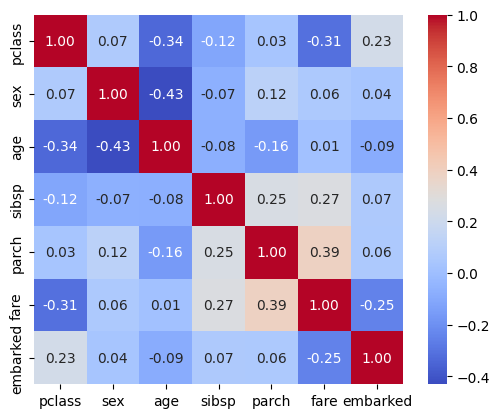

In [107]:
colonnes_interet = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'] + list(df.filter(like='embarked').columns)

matrice_correlation = df[colonnes_interet].corr()

sns.heatmap(matrice_correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True)



<table>
    <tr>
        <td style='width:5%;'>
            <img src='img/feature-engineering.svg'/>
        </td>
        <td style='width:90%;text-align:left;'>
            <div style='font-family:Inter,sans-serif;font-size: 16px;font-weight: 600;line-height: 24px;'>
                Etape 4: Ingénierie des attributs
            </div>
            <span>Génerer des attributs à travers des combinaisons entre les caractéristiques.</span>
        </td>
        <td ></td>
    </tr>
</table>

In [108]:
df['familysize'] = df.sibsp + df.parch + 1

# Modélisation


In [109]:
import numpy as np
from sklearn.model_selection import train_test_split

## 1. Splitting dataset into train and test sets 80%  :20%

In [115]:
X = df.drop('survived', axis=1)
X=df.drop('ticket',axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dimensions de l'ensemble d'entraînement :", X_train.shape, y_train.shape)
print("Dimensions de l'ensemble de test :", X_test.shape, y_test.shape)

Dimensions de l'ensemble d'entraînement : (216, 10) (216,)
Dimensions de l'ensemble de test : (54, 10) (54,)


## 2. Feature scaling

In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3. k Nearest Neighbors

In [122]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import HistGradientBoostingClassifier
model = HistGradientBoostingClassifier(max_iter=100)  # You can adjust max_iter




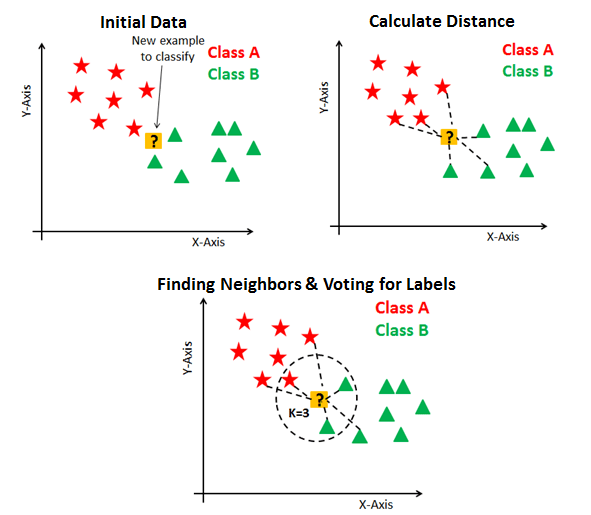

In [ ]:
Image('knn.png')

#### 3.1.Entrainer et tester le modèle

In [121]:
# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print("Model Accuracy: {:.2f}%".format(accuracy * 100))
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Model Accuracy: 100.00%

Confusion Matrix:
 [[18  0]
 [ 0 36]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        36

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



#### 3.2. Afficher la matrice de confusion et les métriques

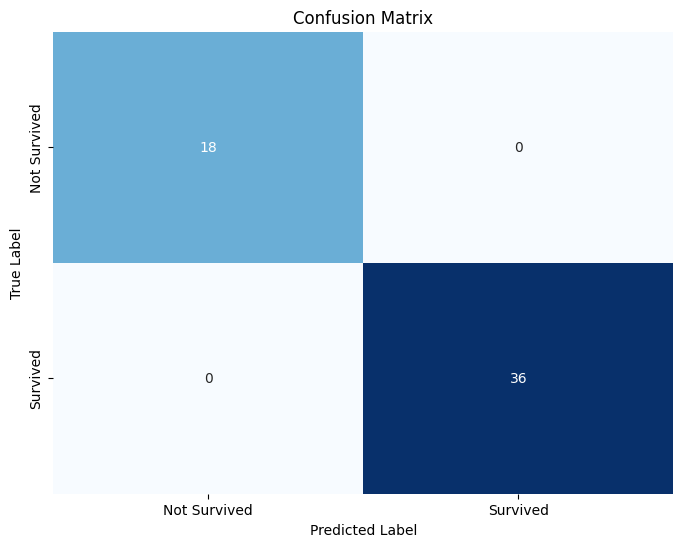

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

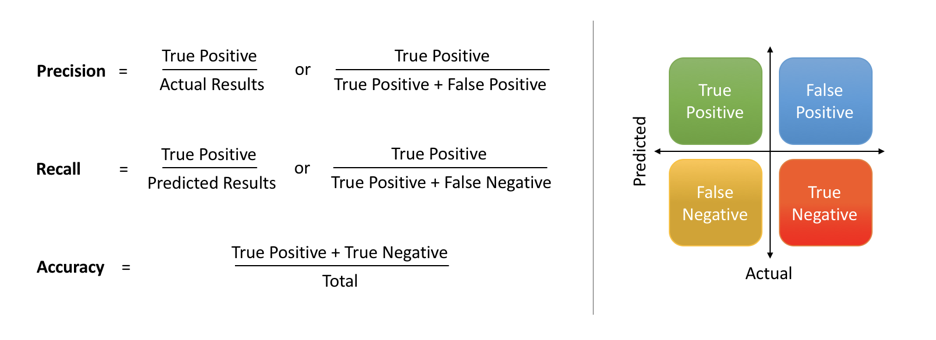

In [ ]:
Image('metrics.png')

#### 3.3 Appliquer GridSearch

In [125]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_iter': [50, 100, 200],         # Number of boosting iterations
    'max_leaf_nodes': [None, 20, 30],   # Maximum number of leaf nodes
    'learning_rate': [0.01, 0.05, 0.1]   # Learning rate
}

# Create an instance of HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1)

# Fit GridSearch to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score: {:.2f}%".format(best_score * 100))

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.01, 'max_iter': 50, 'max_leaf_nodes': None}
Best Cross-Validation Score: 100.00%


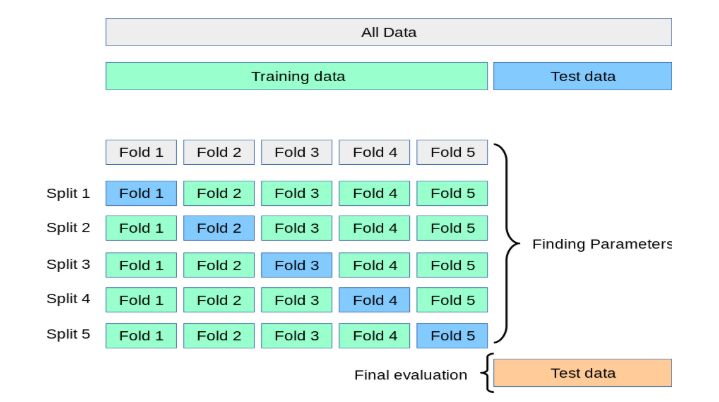

In [ ]:
Image('grid.png')

## 4. Decison Tree

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Best Cross-Validation Score: 100.00%
Accuracy on Test Set: 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        36

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



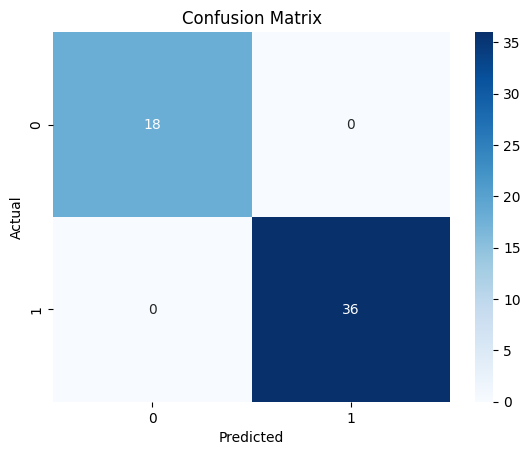

In [126]:
from sklearn.tree import DecisionTreeClassifier
# Define the parameter grid for GridSearch
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criteria for splitting
    'max_depth': [None, 5, 10, 15],     # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],    # Minimum samples required to split an internal node
}

# Create an instance of DecisionTreeClassifier
model = DecisionTreeClassifier()

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1)

# Fit GridSearch to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score: {:.2f}%".format(best_score * 100))
# Make predictions on the test set
y_pred = grid_search.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set: {:.2f}%".format(accuracy * 100))

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


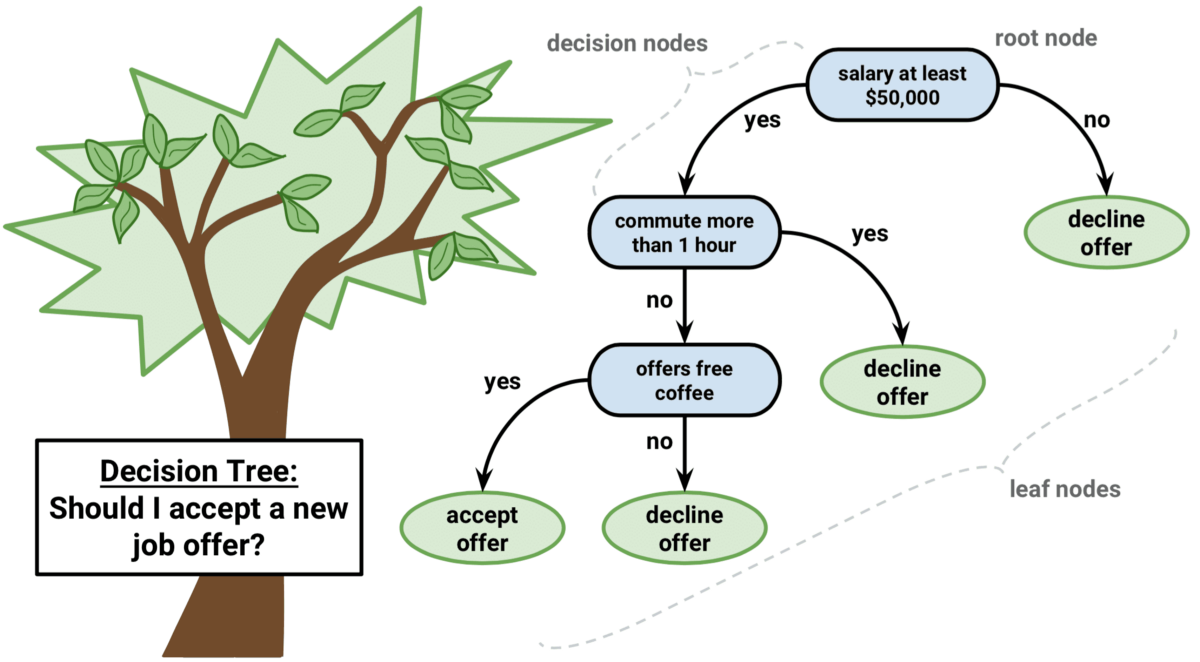

In [ ]:
Image('decision.png')

#### 4.1 Entreiner et tester le modèle

#### 4.2 Appliquer GridSearch

#### 4.3 Afficher les résultats

## 5. Random Forest

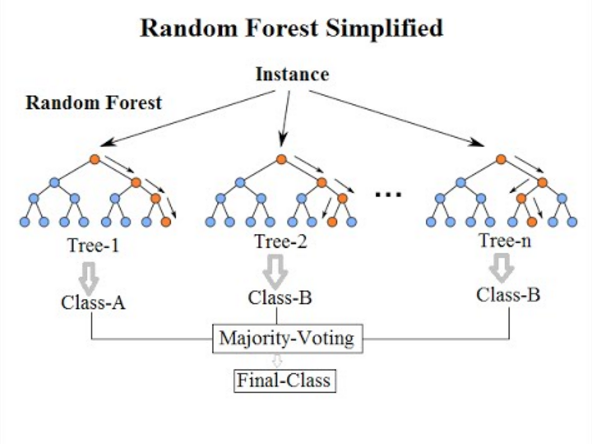

In [ ]:
Image('random_forest.png')

## 6. Support vector Machine

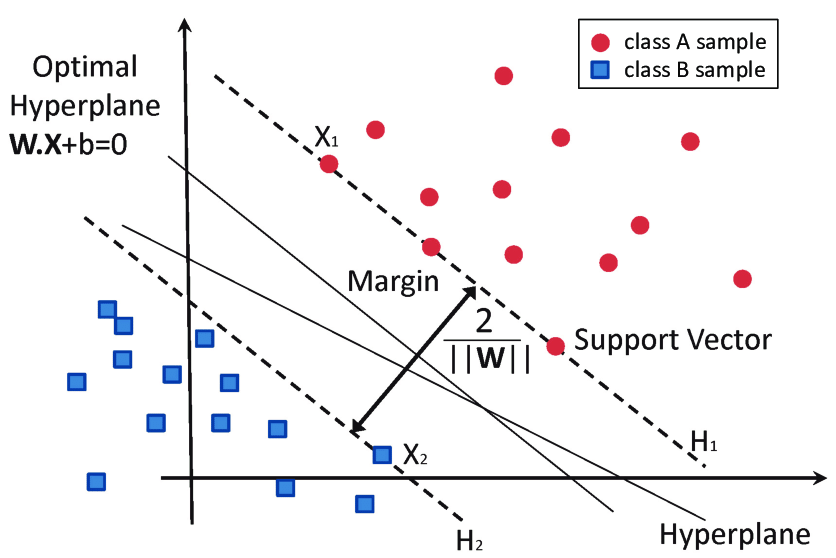

In [ ]:
Image('linear_svm.png')

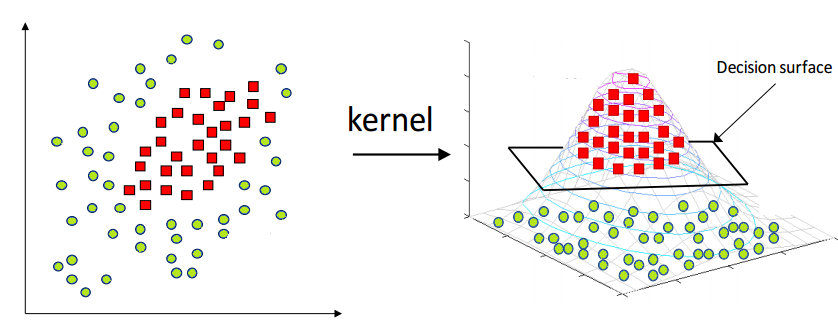

In [ ]:
Image('kernel_svm.png')

## 7. Receiver Operating Characteristic (ROC) Curve

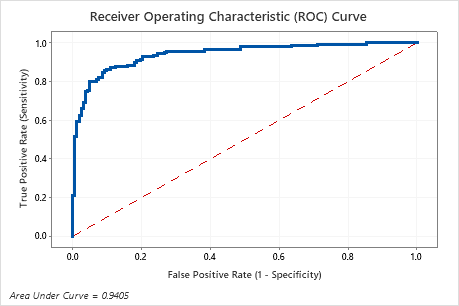

In [ ]:
Image(filename='roc.png')